In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense
from keras.layers import LSTM,BatchNormalization
from keras.layers import Dropout
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
import io

In [3]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
TheftData=pd.read_csv("D:\ElectricityTheft\Dataset\TunedElectricityDataset.csv")

In [5]:
#Converting the Categorical features
TheftData.head()

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,...,10.120000,9.960000,16.920000,7.600000,27.220000,18.050000,26.470000,18.75000,17.840000,14.92000
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,...,8.836129,9.304656,10.758718,9.942215,11.173498,11.482926,11.656425,11.32268,11.015589,10.69165
3,B32AC8CC6D5D805AC053557AB05F5343,1,7.168735,6.954202,6.784099,7.0843,10.51647,7.219633,7.341512,7.160004,...,6.500000,9.990000,11.780000,18.590000,26.800000,18.570000,14.590000,12.82000,19.370000,15.92000
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.900000,3.420000,3.810000,4.5800,3.56000,4.250000,3.860000,3.530000,...,17.770000,10.370000,15.320000,13.510000,12.230000,14.680000,16.350000,18.14000,18.410000,17.31000


In [6]:
X = TheftData.iloc[:, 2:1036].astype('float32' )
y = TheftData.iloc[:, 1]

In [7]:
X

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,10.120000,9.960000,16.920000,7.600000,27.219999,18.049999,26.469999,18.750000,17.840000,14.920000
1,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,8.836129,9.304656,10.758718,9.942215,11.173497,11.482926,11.656425,11.322680,11.015589,10.691649
3,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,6.500000,9.990000,11.780000,18.590000,26.799999,18.570000,14.590000,12.820000,19.370001,15.920000
4,2.900000,3.420000,3.8100,4.580000,3.56000,4.250000,3.860000,3.530000,3.410000,0.850000,...,17.770000,10.370000,15.320000,13.510000,12.230000,14.680000,16.350000,18.139999,18.410000,17.309999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,7.168735,6.954202,6.7841,7.084301,10.51647,7.219634,7.341512,7.160004,6.839875,7.053545,...,4.250000,3.560000,3.380000,4.390000,3.720000,3.770000,3.960000,3.640000,3.400000,4.380000
42368,2.700000,4.390000,3.9500,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.810000,4.870000,4.480000,3.670000,3.310000,4.580000,3.330000,3.190000,4.570000,4.000000
42369,0.580000,0.840000,1.6100,0.900000,0.60000,0.820000,0.890000,0.030000,0.730000,1.680000,...,8.836129,0.660000,2.920000,2.360000,3.860000,4.280000,3.370000,6.670000,2.440000,1.150000
42370,16.889999,13.840000,13.5000,14.600000,14.46000,12.340000,15.370000,17.010000,13.460000,19.559999,...,21.129999,13.750000,22.610001,18.830000,25.520000,18.110001,19.309999,17.480000,17.200001,15.280000


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)


from sklearn.preprocessing import OneHotEncoder
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = y.reshape(len(y), 1)
y = onehot_encoder.fit_transform(integer_encoded)
print(y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [9]:
# Encoding categorical data


In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
X_train

array([[ 5.83492890e-02,  8.28293338e-02,  3.29711258e-01, ...,
        -1.05174378e-01, -9.26953182e-02, -7.29366317e-02],
       [-9.62124846e-04,  3.05217254e-04,  2.35926942e-03, ...,
         8.74745026e-02,  9.84604657e-02,  8.97321030e-02],
       [-1.60191774e-01, -9.74982753e-02, -9.17952433e-02, ...,
        -1.15386665e-01, -1.14151582e-01, -1.09823726e-01],
       ...,
       [-9.62124846e-04,  3.05217254e-04,  2.35926942e-03, ...,
         1.71596110e-01,  8.22057128e-02,  5.98236509e-02],
       [-3.02243471e-01, -2.59867966e-01, -3.04129690e-01, ...,
        -1.87218904e-01, -1.71530828e-01, -1.69308305e-01],
       [-1.58090428e-01, -2.08987132e-01, -2.59855688e-01, ...,
        -1.86526552e-01, -1.71530828e-01, -1.68975994e-01]], dtype=float32)

In [12]:
X_train.shape

(31779, 1034)

In [13]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [14]:
y_train.shape

(31779, 2)

In [15]:
X_test.shape

(10593, 1034)

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Add input layer
model.add(layers.Input(shape=(1034,)))

# Add hidden layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))  # Adding dropout for regularization
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))

# Add output layer
model.add(layers.Dense(2, activation='softmax'))  # Adjust activation based on your task (e.g., 'softmax' for multi-class classification)

# Compile the model


# Print model summary

In [17]:
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train, y_train,validation_split=0.25, batch_size = 256, epochs = 5)

Epoch 1/5
94/94 [==============================] - 6s 69ms/step - loss: 0.3956 - accuracy: 0.8828 - val_loss: 0.3145 - val_accuracy: 0.9150
Epoch 2/5
94/94 [==============================] - 2s 22ms/step - loss: 0.3106 - accuracy: 0.9152 - val_loss: 0.2965 - val_accuracy: 0.9153
Epoch 3/5
94/94 [==============================] - 2s 22ms/step - loss: 0.2944 - accuracy: 0.9152 - val_loss: 0.2875 - val_accuracy: 0.9152
Epoch 4/5
94/94 [==============================] - 2s 25ms/step - loss: 0.2884 - accuracy: 0.9152 - val_loss: 0.2825 - val_accuracy: 0.9144
Epoch 5/5
94/94 [==============================] - 2s 25ms/step - loss: 0.2845 - accuracy: 0.9145 - val_loss: 0.2785 - val_accuracy: 0.9147


In [18]:
history.history['accuracy']

[0.8828144669532776,
 0.9151632189750671,
 0.9151632189750671,
 0.915205180644989,
 0.9145338535308838]

In [19]:
history.history['val_accuracy']

[0.915040910243988,
 0.9152926206588745,
 0.9151667952537537,
 0.9144116044044495,
 0.9146633148193359]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


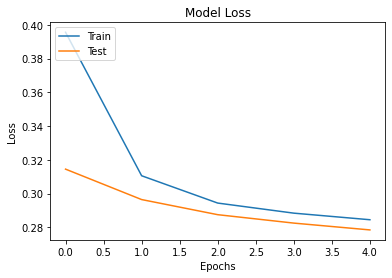

In [20]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.show()

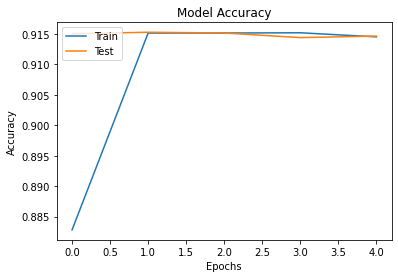

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.show()

In [22]:
y_pred = model.predict(X_test)

In [23]:
for y in y_pred:
    print(y)
    print("==============")

[0.8720438  0.12795618]
[0.96222705 0.03777288]
[0.94229555 0.05770446]
[0.9655109  0.03448912]
[0.938335   0.06166497]
[0.90848213 0.0915179 ]
[0.9147545  0.08524547]
[0.79337066 0.20662938]
[0.9762063  0.02379375]
[0.7153455  0.28465444]
[0.9085885  0.09141144]
[0.9531004  0.04689959]
[0.90737575 0.09262422]
[0.98189825 0.01810179]
[0.93155605 0.06844396]
[0.98476285 0.01523708]
[0.83952814 0.16047184]
[0.879486   0.12051397]
[0.8548758 0.1451242]
[0.8477204  0.15227954]
[0.83618623 0.16381371]
[0.9344682  0.06553177]
[0.9693552  0.03064481]
[0.70800436 0.2919956 ]
[0.8905589 0.1094411]
[0.9797539  0.02024605]
[0.9499661  0.05003387]
[0.97668016 0.02331989]
[0.8696117 0.1303884]
[0.98481524 0.01518478]
[0.8418067 0.1581933]
[0.89007235 0.10992766]
[0.86375946 0.13624056]
[0.9706364 0.0293635]
[0.90735906 0.09264091]
[0.8126137  0.18738633]
[0.97163355 0.02836645]
[0.87851906 0.12148095]
[0.92806274 0.07193729]
[0.9550328  0.04496722]
[0.9540307  0.04596928]
[0.8416474 0.1583526]
[0.9

[0.9319659  0.06803413]
[0.91970205 0.08029798]
[0.98464024 0.01535974]
[0.7277392 0.2722608]
[0.57998306 0.42001694]
[0.95015156 0.04984839]
[0.9836992  0.01630086]
[0.98417896 0.01582101]
[0.96667475 0.03332525]
[0.9754377  0.02456228]
[0.95864373 0.04135624]
[0.97824734 0.02175262]
[0.9222252 0.0777748]
[0.96404237 0.03595757]
[0.9844997  0.01550031]
[0.8335214  0.16647859]
[0.97990215 0.02009781]
[0.88155097 0.11844909]
[0.7709858  0.22901423]
[0.9809786  0.01902139]
[0.96022785 0.03977215]
[0.8941697  0.10583037]
[0.9662781 0.0337219]
[0.9686202  0.03137988]
[0.97919047 0.02080954]
[0.98501945 0.01498055]
[0.96889246 0.03110758]
[0.96021587 0.03978413]
[0.90583974 0.09416018]
[0.8851259  0.11487411]
[0.9069994  0.09300064]
[0.8268441  0.17315584]
[0.9567346 0.0432654]
[0.90357006 0.09642992]
[0.93031543 0.06968457]
[0.98187125 0.01812875]
[0.895122   0.10487801]
[0.9511073  0.04889264]
[0.98357016 0.01642982]
[0.986115   0.01388497]
[0.96299356 0.03700645]
[0.98471457 0.01528546]


[0.880632   0.11936795]
[0.7446945  0.25530547]
[0.9738096  0.02619038]
[0.9429759 0.0570241]
[0.7262208  0.27377924]
[0.9413145  0.05868554]
[0.96376306 0.0362369 ]
[0.9368574  0.06314257]
[0.9733579  0.02664206]
[0.9808514  0.01914861]
[0.843616   0.15638395]
[0.99458575 0.00541427]
[0.9297222  0.07027787]
[0.9074955  0.09250446]
[0.92304325 0.07695677]
[0.93522143 0.06477854]
[0.90508115 0.09491881]
[0.8926604  0.10733962]
[0.9752329  0.02476707]
[0.98279977 0.01720023]
[0.9325408  0.06745919]
[0.95372385 0.04627609]
[0.97506523 0.02493481]
[0.9184772  0.08152281]
[0.8825536 0.1174465]
[0.9834188  0.01658116]
[0.98065543 0.01934457]
[0.9751075  0.02489255]
[0.9455716  0.05442839]
[0.9612218 0.0387781]
[0.8664517 0.1335484]
[0.920703 0.079297]
[0.8737282 0.1262718]
[0.8830347  0.11696533]
[0.9319632  0.06803682]
[0.9827839  0.01721614]
[0.7282162  0.27178386]
[0.9580279  0.04197212]
[0.9484679  0.05153202]
[0.9397062  0.06029379]
[0.77000874 0.22999124]
[0.8321307  0.16786928]
[0.982

[0.74781024 0.2521897 ]
[0.7858009  0.21419913]
[0.86744106 0.13255894]
[0.9825408  0.01745919]
[0.8017508  0.19824918]
[0.80970305 0.19029687]
[0.951691   0.04830901]
[0.8456772  0.15432282]
[0.9595192  0.04048076]
[0.9193555  0.08064446]
[0.9491737 0.0508263]
[0.61155766 0.38844234]
[0.9796118  0.02038813]
[0.7714479  0.22855207]
[0.96318465 0.03681533]
[0.7846366 0.2153634]
[0.8720267  0.12797332]
[0.9568156  0.04318445]
[0.95678973 0.04321027]
[0.86364126 0.13635874]
[0.9818602  0.01813978]
[0.8874425  0.11255747]
[0.88936895 0.11063104]
[0.97300714 0.0269928 ]
[0.9657813 0.0342188]
[0.87745506 0.12254498]
[0.91469544 0.08530457]
[0.74055773 0.25944224]
[0.92974204 0.07025792]
[0.90099746 0.09900257]
[0.9581164  0.04188356]
[0.9212306  0.07876936]
[0.9131351  0.08686484]
[0.6109804  0.38901958]
[0.92763716 0.07236285]
[0.75140566 0.24859434]
[0.93623483 0.0637651 ]
[0.82325447 0.17674555]
[0.96815675 0.03184326]
[0.96187246 0.03812755]
[0.98387194 0.01612804]
[0.9854938  0.01450616

[0.5512785  0.44872156]
[0.80536133 0.19463865]
[0.88255847 0.11744155]
[0.95831245 0.04168756]
[0.9585976  0.04140241]
[0.9283045  0.07169546]
[0.8980133  0.10198669]
[0.5068224  0.49317762]
[0.95038724 0.04961273]
[0.8717196  0.12828043]
[0.8252204 0.1747796]
[0.95433646 0.04566351]
[0.9685324  0.03146758]
[0.9794988  0.02050118]
[0.362412   0.63758796]
[0.93023366 0.06976634]
[0.98384136 0.01615866]
[0.81387436 0.18612565]
[0.92054176 0.07945824]
[0.9408242  0.05917575]
[0.9546611  0.04533891]
[0.94308215 0.05691789]
[0.95723814 0.0427619 ]
[0.94162166 0.05837829]
[0.9843402  0.01565978]
[0.23491836 0.7650817 ]
[0.9512154  0.04878459]
[0.59642875 0.40357128]
[0.93074024 0.06925981]
[0.89942396 0.10057604]
[0.9575693  0.04243066]
[0.9729085  0.02709142]
[0.95864373 0.04135624]
[0.79809284 0.20190716]
[0.89942676 0.1005732 ]
[0.9418804  0.05811967]
[0.9536122 0.0463878]
[0.97669625 0.02330366]
[0.7676974  0.23230255]
[0.91817546 0.0818245 ]
[0.8902765  0.10972349]
[0.9115612  0.088438

[0.9558992  0.04410087]
[0.8525787  0.14742132]
[0.966194 0.033806]
[0.98162776 0.01837223]
[0.9646724  0.03532765]
[0.97506386 0.02493616]
[0.90289164 0.09710837]
[0.86495996 0.13504004]
[0.9575998  0.04240021]
[0.961573   0.03842702]
[0.82703257 0.17296745]
[0.9470381  0.05296187]
[0.9395722  0.06042773]
[0.83049184 0.16950813]
[0.9586036  0.04139638]
[0.8449832  0.15501681]
[0.97606194 0.02393809]
[0.9143397  0.08566026]
[0.9059786  0.09402145]
[0.8422094  0.15779056]
[0.9388739  0.06112609]
[0.93715525 0.0628447 ]
[0.92299896 0.077001  ]
[0.9543473  0.04565266]
[0.93392825 0.06607177]
[0.97645694 0.02354299]
[0.8655312  0.13446878]
[0.9109151  0.08908488]
[0.8920943  0.10790575]
[0.9577134  0.04228653]
[0.96285903 0.03714092]
[0.95496744 0.04503259]
[0.6557112  0.34428886]
[0.7286071  0.27139285]
[0.8995365  0.10046349]
[0.97102237 0.02897765]
[0.92154676 0.07845318]
[0.95864373 0.04135624]
[0.971348   0.02865202]
[0.9739649  0.02603505]
[0.91223484 0.08776516]
[0.96434605 0.035653

[0.9753728  0.02462718]
[0.9567913  0.04320872]
[0.9839919  0.01600808]
[0.9206711  0.07932894]
[0.93178916 0.06821085]
[0.9754351  0.02456494]
[0.8607407  0.13925925]
[0.8842761  0.11572389]
[0.9372206  0.06277939]
[0.97649324 0.02350677]
[0.9124253  0.08757476]
[0.97442234 0.02557764]
[0.9147526  0.08524736]
[0.8493365  0.15066345]
[0.8690965  0.13090351]
[0.8776169  0.12238306]
[0.8174159  0.18258414]
[0.93462646 0.06537357]
[0.9537901  0.04620992]
[0.9420929  0.05790716]
[0.8681857  0.13181438]
[0.83350825 0.16649175]
[0.9359149  0.06408506]
[0.89445114 0.10554891]
[0.96152043 0.03847953]
[0.90795684 0.09204314]
[0.9645304  0.03546957]
[0.95855236 0.04144765]
[0.8574361  0.14256383]
[0.9299758  0.07002416]
[0.86730254 0.13269754]
[0.7868247  0.21317528]
[0.9502496  0.04975034]
[0.7256532 0.2743468]
[0.972444   0.02755602]
[0.87637234 0.12362762]
[0.8924454  0.10755464]
[0.96090823 0.03909176]
[0.96429646 0.03570356]
[0.9221696  0.07783039]
[0.2139194 0.7860806]
[0.97333616 0.026663

[0.942193   0.05780701]
[0.9599878  0.04001212]
[0.91834354 0.08165652]
[0.98470956 0.01529046]
[0.91105884 0.0889412 ]
[0.98423475 0.01576528]
[0.8373815  0.16261849]
[0.96148926 0.0385108 ]
[0.95864373 0.04135624]
[0.89779705 0.10220298]
[0.94815105 0.05184893]
[0.9559966  0.04400344]
[0.89347386 0.10652615]
[0.87577295 0.12422707]
[0.88361686 0.11638309]
[0.96820396 0.03179603]
[0.95679957 0.04320047]
[0.984153   0.01584706]
[0.9305496  0.06945034]
[0.9173739  0.08262607]
[0.78037906 0.21962097]
[0.7399152  0.26008484]
[0.9192468  0.08075316]
[0.87697124 0.12302873]
[0.9865448  0.01345519]
[0.95745033 0.04254971]
[0.8479072  0.15209278]
[0.82837087 0.17162913]
[0.92763776 0.07236224]
[0.905737   0.09426297]
[0.81267434 0.18732566]
[0.9689764  0.03102358]
[0.8349636  0.16503637]
[0.9770035  0.02299646]
[0.36771995 0.63228005]
[0.98435277 0.01564725]
[0.9464084  0.05359161]
[0.6233384  0.37666157]
[0.9751756  0.02482441]
[0.8536717  0.14632826]
[0.96047336 0.03952664]
[0.94408065 0.05

[0.9345952  0.06540481]
[0.9395862  0.06041374]
[0.954101   0.04589901]
[0.8951263  0.10487376]
[0.90531313 0.09468681]
[0.9841542  0.01584578]
[0.9216092  0.07839073]
[0.90879256 0.09120741]
[0.8421126  0.15788735]
[0.86542207 0.13457794]
[0.758529 0.241471]
[0.96429193 0.03570808]
[0.9708384  0.02916153]
[0.98358786 0.01641207]
[0.9328584  0.06714153]
[0.9317591  0.06824089]
[0.98179597 0.01820404]
[0.86719286 0.13280714]
[0.95489126 0.04510879]
[0.97836226 0.02163772]
[0.8279659  0.17203403]
[0.98129857 0.01870149]
[0.89034796 0.10965204]
[0.7333164  0.26668358]
[0.8877791  0.11222085]
[0.8475943  0.15240566]
[0.9845451  0.01545491]
[0.88691914 0.1130809 ]
[0.95533377 0.04466628]
[0.84707993 0.15292004]
[0.98091847 0.01908155]
[0.9757295  0.02427056]
[0.94561315 0.0543869 ]
[0.9203107  0.07968931]
[0.9801326  0.01986734]
[0.9701292  0.02987084]
[0.8707827  0.12921731]
[0.9272915  0.07270855]
[0.9210415  0.07895857]
[0.94993305 0.05006691]
[0.9519264  0.04807353]
[0.950324   0.049676

[0.94491047 0.05508957]
[0.94831115 0.05168885]
[0.98429316 0.01570683]
[0.9058692  0.09413081]
[0.92842895 0.07157111]
[0.9625182  0.03748182]
[0.9835355  0.01646446]
[0.93375945 0.06624059]
[0.9164212  0.08357877]
[0.9023206 0.0976794]
[0.96575546 0.03424459]
[0.7757808 0.2242192]
[0.9526793  0.04732068]
[0.9713182  0.02868178]
[0.88518775 0.11481225]
[0.94047964 0.05952035]
[0.9704348  0.02956519]
[0.9735727  0.02642731]
[0.85342264 0.14657736]
[0.862356   0.13764398]
[0.9185353  0.08146472]
[0.923237   0.07676302]
[0.8461263  0.15387371]
[0.9816366  0.01836339]
[0.9600886  0.03991137]
[0.97563404 0.0243659 ]
[0.9529071  0.04709286]
[0.9464722  0.05352772]
[0.8934605  0.10653949]
[0.9565125 0.0434875]
[0.87011844 0.12988165]
[0.8797784  0.12022154]
[0.8863543  0.11364572]
[0.9118692  0.08813073]
[0.8964665  0.10353347]
[0.62867945 0.37132058]
[0.95684516 0.04315488]
[0.96530205 0.03469796]
[0.9508268  0.04917318]
[0.92579854 0.07420142]
[0.91340905 0.08659095]
[0.93809384 0.06190615

[0.9015615  0.09843849]
[0.9751579  0.02484207]
[0.9523174  0.04768253]
[0.98248637 0.01751359]
[0.96062785 0.03937218]
[0.9036854 0.0963146]
[0.8921046  0.10789534]
[0.87695026 0.12304976]
[0.98005694 0.01994305]
[0.8642521  0.13574788]
[0.8377626  0.16223747]
[0.9712815  0.02871847]
[0.81148416 0.18851583]
[0.87658197 0.12341805]
[0.9578945  0.04210553]
[0.9026923  0.09730769]
[0.80383384 0.19616619]
[0.92889845 0.07110157]
[0.9502035 0.0497966]
[0.91250527 0.08749473]
[0.95418537 0.04581467]
[0.9420582  0.05794185]
[0.88129514 0.11870488]
[0.98303944 0.01696051]
[0.9585862  0.04141379]
[0.78856516 0.21143483]
[0.83533126 0.16466872]
[0.91926926 0.08073074]
[0.9547144  0.04528559]
[0.9056298  0.09437018]
[0.9258427  0.07415728]
[0.9615799  0.03842008]
[0.9706078  0.02939221]
[0.9512343  0.04876575]
[0.9760778  0.02392215]
[0.8560894  0.14391051]
[0.98345125 0.01654878]
[0.9831082 0.0168917]
[0.96401924 0.03598076]
[0.93891907 0.06108092]
[0.90761393 0.0923861 ]
[0.9591214  0.04087859

[0.9768455  0.02315455]
[0.95555216 0.04444785]
[0.95095944 0.04904053]
[0.98194295 0.01805704]
[0.97976893 0.02023108]
[0.9297041  0.07029587]
[0.94518507 0.05481495]
[0.93918514 0.06081487]
[0.9152418 0.0847583]
[0.8660044  0.13399555]
[0.9101836  0.08981637]
[0.97001463 0.02998537]
[0.905051   0.09494898]
[0.93326247 0.06673753]
[0.94244725 0.05755275]
[0.95066917 0.04933077]
[0.9013149  0.09868515]
[0.96248573 0.03751426]
[0.9180563  0.08194374]
[0.9808832  0.01911678]
[0.88653195 0.11346813]
[0.94539285 0.0546071 ]
[0.922173   0.07782696]
[0.9269216  0.07307843]
[0.8413333  0.15866674]
[0.85280335 0.14719665]
[0.91847557 0.08152443]
[0.97250867 0.02749138]
[0.93390673 0.06609324]
[0.802264   0.19773597]
[0.96179867 0.03820127]
[0.79036474 0.20963527]
[0.8670242  0.13297577]
[0.9200317  0.07996828]
[0.9729085  0.02709142]
[0.962379   0.03762108]
[0.94149315 0.05850688]
[0.95054054 0.04945942]
[0.9445607  0.05543929]
[0.86167634 0.1383236 ]
[0.7540935  0.24590647]
[0.9687903  0.0312

[0.74074584 0.2592542 ]
[0.9511599  0.04884012]
[0.9470131 0.0529869]
[0.812583   0.18741705]
[0.88110596 0.1188941 ]
[0.9175792  0.08242079]
[0.87252516 0.12747484]
[0.96277696 0.03722303]
[0.9837642  0.01623586]
[0.9834441  0.01655594]
[0.9800062  0.01999375]
[0.97410005 0.02589997]
[0.97073126 0.02926872]
[0.3309881 0.6690119]
[0.84876126 0.15123874]
[0.8736882  0.12631181]
[0.977289   0.02271097]
[0.9383558  0.06164424]
[0.7476251  0.25237492]
[0.9343714  0.06562857]
[0.94709396 0.05290603]
[0.8978627  0.10213733]
[0.96704113 0.03295885]
[0.9343637  0.06563634]
[0.9029509 0.0970491]
[0.8248374  0.17516258]
[0.8399909  0.16000913]
[0.95336694 0.0466331 ]
[0.9603388  0.03966123]
[0.9657769  0.03422312]
[0.7344145 0.2655855]
[0.51486236 0.4851377 ]
[0.84242857 0.15757143]
[0.9387684  0.06123161]
[0.94022083 0.05977913]
[0.9241472  0.07585285]
[0.81339437 0.1866056 ]
[0.9190614  0.08093856]
[0.968978   0.03102201]
[0.85134685 0.14865324]
[0.95772415 0.04227588]
[0.95861    0.04139008]


[0.9389571  0.06104293]
[0.97825617 0.02174387]
[0.9626856  0.03731445]
[0.9036079 0.0963921]
[0.95647585 0.04352415]
[0.9533547  0.04664529]
[0.9317104  0.06828957]
[0.868302   0.13169806]
[0.83779615 0.16220391]
[0.9384274  0.06157263]
[0.95609266 0.04390737]
[0.9272404  0.07275964]
[0.97109014 0.02890982]
[0.950896   0.04910395]
[0.96108526 0.03891467]
[0.9748642  0.02513579]
[0.83406055 0.16593951]
[0.95439607 0.04560392]
[0.91070276 0.08929721]
[0.8642955  0.13570456]
[0.89815086 0.10184912]
[0.94277054 0.05722952]
[0.93654704 0.06345295]
[0.79658866 0.20341136]
[0.96639735 0.03360266]
[0.8418268  0.15817317]
[0.91112363 0.08887638]
[0.93099743 0.06900257]
[0.97319746 0.0268025 ]
[0.9589714  0.04102864]
[0.85258675 0.14741324]
[0.749949   0.25005102]
[0.8177409  0.18225905]
[0.9557634  0.04423662]
[0.983245   0.01675494]
[0.9710911  0.02890895]
[0.983887   0.01611293]
[0.9783131  0.02168696]
[0.9718669 0.0281331]
[0.85738957 0.14261039]
[0.9234419  0.07655814]
[0.9823789  0.017621

[0.2940914  0.70590866]
[0.7816593 0.2183407]
[0.95864373 0.04135624]
[0.9324677  0.06753234]
[0.9614924  0.03850759]
[0.9734621  0.02653794]
[0.8956298  0.10437011]
[0.919779   0.08022103]
[0.9179649  0.08203514]
[0.8431642  0.15683576]
[0.928228   0.07177205]
[0.8969613  0.10303865]
[0.939822   0.06017795]
[0.896417  0.1035829]
[0.849384   0.15061603]
[0.86424434 0.13575563]
[0.9310774  0.06892256]
[0.96100646 0.03899351]
[0.8998258 0.1001742]
[0.90823555 0.09176443]
[0.9273042  0.07269576]
[0.87025565 0.12974444]
[0.6090608 0.3909392]
[0.95834726 0.04165279]
[0.96070457 0.03929542]
[0.46379882 0.5362012 ]
[0.9815887  0.01841125]
[0.9852583  0.01474177]
[0.9802737  0.01972632]
[0.9153685  0.08463155]
[0.9061218  0.09387823]
[0.8060767  0.19392328]
[0.97896886 0.02103119]
[0.98468333 0.01531661]
[0.9336217 0.0663783]
[0.9795319  0.02046816]
[0.98741794 0.01258209]
[0.84257954 0.15742049]
[0.8955632  0.10443677]
[0.977794   0.02220603]
[0.9678844  0.03211553]
[0.81395674 0.18604325]
[0

[0.95141804 0.04858202]
[0.91538996 0.08460999]
[0.90642256 0.09357747]
[0.88656837 0.11343159]
[0.8632598  0.13674016]
[0.832161   0.16783902]
[0.9440996  0.05590048]
[0.9100138  0.08998623]
[0.8735234  0.12647657]
[0.7102412 0.2897588]
[0.9712526  0.02874739]
[0.9214202 0.0785798]
[0.9561675  0.04383246]
[0.8928792  0.10712083]
[0.93544495 0.06455509]
[0.8293094  0.17069057]
[0.95864373 0.04135624]
[0.36649176 0.6335082 ]
[0.9385542  0.06144573]
[0.79802895 0.20197107]
[0.8376908  0.16230918]
[0.7969263  0.20307373]
[0.8266663  0.17333367]
[0.95345384 0.04654618]
[0.90086955 0.09913043]
[0.95204896 0.04795101]
[0.88140315 0.11859687]
[0.88876474 0.11123519]
[0.9170682  0.08293178]
[0.83960605 0.16039394]
[0.94108564 0.0589143 ]
[0.88324064 0.11675934]
[0.9351983  0.06480172]
[0.9214086  0.07859141]
[0.9523187  0.04768125]
[0.9548478  0.04515219]
[0.91726995 0.08273008]
[0.86815673 0.13184322]
[0.9607282  0.03927181]
[0.9752244  0.02477563]
[0.9287506  0.07124938]
[0.937726   0.062274

[0.8956045  0.10439553]
[0.84251326 0.15748677]
[0.8834724  0.11652763]
[0.88493997 0.11505998]
[0.9615224  0.03847755]
[0.8943713  0.10562875]
[0.83278894 0.16721112]
[0.21719621 0.7828038 ]
[0.9614571  0.03854292]
[0.8543123  0.14568768]
[0.8797886  0.12021147]
[0.81461954 0.1853805 ]
[0.8902096  0.10979038]
[0.90166986 0.09833012]
[0.9807335  0.01926647]
[0.82448643 0.17551357]
[0.9527683  0.04723164]
[0.9773531  0.02264685]
[0.96044654 0.0395535 ]
[0.9013787  0.09862128]
[0.8912864  0.10871369]
[0.8276312  0.17236884]
[0.9364261  0.06357392]
[0.9057393  0.09426072]
[0.76847595 0.23152407]
[0.9742964  0.02570361]
[0.9240843  0.07591566]
[0.771299   0.22870095]
[0.84430707 0.15569293]
[0.94827336 0.05172664]
[0.9787729  0.02122712]
[0.7566694  0.24333064]
[0.9744914  0.02550866]
[0.9369836  0.06301641]
[0.98456305 0.01543695]
[0.9166302  0.08336981]
[0.9327666  0.06723334]
[0.9432009  0.05679914]
[0.90758455 0.09241548]
[0.8497266  0.15027346]
[0.8930419  0.10695806]
[0.9075552  0.09

[0.8293216  0.17067836]
[0.83331925 0.16668078]
[0.9719197  0.02808032]
[0.98046714 0.01953283]
[0.9490812  0.05091878]
[0.8460561  0.15394391]
[0.87686557 0.12313449]
[0.9849975  0.01500246]
[0.9083393 0.0916607]
[0.848885   0.15111499]
[0.9623769 0.0376231]
[0.8663914  0.13360853]
[0.9753916  0.02460834]
[0.7436573  0.25634274]
[0.92657083 0.07342916]
[0.9573938 0.0426062]
[0.7918098 0.2081902]
[0.789185 0.210815]
[0.78079915 0.21920078]
[0.7700337  0.22996625]
[0.9848623  0.01513765]
[0.80986845 0.19013152]
[0.9657169  0.03428308]
[0.9169861  0.08301389]
[0.84042186 0.1595781 ]
[0.91326207 0.08673792]
[0.90849304 0.09150697]
[0.8853788  0.11462119]
[0.9506538  0.04934624]
[0.938246   0.06175398]
[0.91614455 0.08385543]
[0.88717175 0.11282824]
[0.9017536  0.09824635]
[0.9555354  0.04446457]
[0.9396196  0.06038046]
[0.9554517  0.04454826]
[0.9037318 0.0962682]
[0.84501743 0.15498257]
[0.9081709  0.09182915]
[0.96465045 0.03534951]
[0.85185933 0.14814068]
[0.93226177 0.06773821]
[0.904

[0.8013504  0.19864966]
[0.966108   0.03389192]
[0.9793392  0.02066085]
[0.8983292  0.10167084]
[0.843222   0.15677795]
[0.9225301  0.07746983]
[0.9343985 0.0656015]
[0.8423713 0.1576287]
[0.9109141  0.08908589]
[0.9399821  0.06001794]
[0.80531925 0.19468075]
[0.9409702  0.05902984]
[0.97890866 0.02109128]
[0.8829854 0.1170146]
[0.8968748  0.10312525]
[0.87499064 0.12500936]
[0.9829274  0.01707258]
[0.9841335  0.01586652]
[0.9356649  0.06433518]
[0.98460615 0.01539388]
[0.9570385  0.04296151]
[0.86415017 0.1358499 ]
[0.98454535 0.01545463]
[0.98461956 0.01538042]
[0.9016096  0.09839038]
[0.9584582  0.04154181]
[0.9746753 0.0253247]
[0.9300806 0.0699194]
[0.9351304  0.06486958]
[0.7791966  0.22080342]
[0.87086093 0.12913904]
[0.97838676 0.02161327]
[0.8930518  0.10694818]
[0.92838776 0.07161227]
[0.97358286 0.02641719]
[0.7345749  0.26542512]
[0.8836747  0.11632529]
[0.89105797 0.10894199]
[0.93538004 0.06461998]
[0.9671148  0.03288515]
[0.83514684 0.16485322]
[0.80612165 0.1938784 ]
[0

[0.86154175 0.13845822]
[0.9471464  0.05285351]
[0.94100523 0.05899475]
[0.89482    0.10518002]
[0.9045046  0.09549544]
[0.9219575  0.07804251]
[0.93754804 0.06245193]
[0.90760505 0.0923949 ]
[0.97490895 0.02509102]
[0.95864373 0.04135624]
[0.9709873  0.02901268]
[0.9528031  0.04719687]
[0.9192017  0.08079834]
[0.8801792  0.11982074]
[0.91543394 0.08456603]
[0.87389755 0.12610248]
[0.95213974 0.04786029]
[0.9225911  0.07740892]
[0.9242274  0.07577258]
[0.9625571  0.03744289]
[0.9285415  0.07145857]
[0.9109732  0.08902682]
[0.97732717 0.02267283]
[0.9624864  0.03751362]
[0.9798719  0.02012805]
[0.9008178  0.09918223]
[0.95558786 0.04441218]
[0.9378791  0.06212093]
[0.95864373 0.04135624]
[0.9725179  0.02748205]
[0.8767061  0.12329392]
[0.9535688  0.04643119]
[0.94578254 0.05421745]
[0.8335506  0.16644941]
[0.9039349  0.09606506]
[0.85208946 0.14791054]
[0.8286991  0.17130087]
[0.9142621  0.08573795]
[0.8946612  0.10533886]
[0.96423566 0.03576437]
[0.841337   0.15866303]
[0.941449   0.05

[0.9390787  0.06092128]
[0.879313   0.12068706]
[0.88081825 0.11918174]
[0.96399343 0.03600662]
[0.868145   0.13185503]
[0.93416923 0.06583074]
[0.9660918  0.03390814]
[0.91522855 0.08477147]
[0.9729883  0.02701167]
[0.91802734 0.08197269]
[0.94482553 0.0551745 ]
[0.9766148  0.02338522]
[0.96141773 0.03858224]
[0.87603533 0.12396459]
[0.91121334 0.08878669]
[0.869105   0.13089502]
[0.97836226 0.02163778]
[0.85759777 0.14240225]
[0.9728196 0.0271804]
[0.8458018 0.1541982]
[0.94468975 0.05531024]
[0.95864373 0.04135624]
[0.9680787  0.03192132]
[0.94334644 0.05665363]
[0.83539957 0.16460043]
[0.95740396 0.04259607]
[0.8986317  0.10136839]
[0.731918   0.26808202]
[0.8783048  0.12169529]
[0.92218685 0.07781312]
[0.9839813  0.01601867]
[0.9720087  0.02799129]
[0.9754386  0.02456143]
[0.95615923 0.04384077]
[0.95241183 0.04758816]
[0.9235592  0.07644082]
[0.91955334 0.08044668]
[0.95361596 0.04638401]
[0.9063088  0.09369119]
[0.9666716  0.03332842]
[0.91757464 0.0824253 ]
[0.8847303  0.115269

[0.92088497 0.07911501]
[0.9382695 0.0617305]
[0.9315365  0.06846353]
[0.89447343 0.10552658]
[0.92973435 0.07026567]
[0.9015969  0.09840312]
[0.8988676  0.10113244]
[0.94669324 0.05330675]
[0.8948263  0.10517371]
[0.87295    0.12704994]
[0.8515525  0.14844748]
[0.8904718  0.10952815]
[0.92246157 0.07753842]
[0.93930006 0.06069991]
[0.9833363  0.01666364]
[0.73034817 0.2696519 ]
[0.93549675 0.06450325]
[0.8956727  0.10432729]
[0.95327604 0.04672401]
[0.98221534 0.01778471]
[0.8938824  0.10611761]
[0.93127817 0.0687219 ]
[0.89699304 0.10300693]
[0.82602376 0.17397624]
[0.9649799  0.03502008]
[0.91505647 0.08494351]
[0.9159795  0.08402052]
[0.9380644  0.06193561]
[0.97229236 0.02770758]
[0.92471015 0.07528985]
[0.7971755  0.20282449]
[0.89092416 0.10907581]
[0.8696685  0.13033158]
[0.9495455  0.05045446]
[0.8052217  0.19477835]
[0.8203954  0.17960455]
[0.9841553  0.01584467]
[0.8314781  0.16852194]
[0.9707507  0.02924936]
[0.81532365 0.1846764 ]
[0.946969   0.05303108]
[0.9224782  0.0775

[0.9702855  0.02971456]
[0.9391688  0.06083122]
[0.96829647 0.03170351]
[0.67051345 0.32948655]
[0.86607414 0.13392583]
[0.84739625 0.15260367]
[0.8594405  0.14055943]
[0.9700982  0.02990174]
[0.9482068  0.05179319]
[0.7496499  0.25035003]
[0.89069    0.10930995]
[0.8299153  0.17008467]
[0.981608   0.01839196]
[0.8350111  0.16498882]
[0.8053157  0.19468433]
[0.8813124  0.11868756]
[0.9542075  0.04579254]
[0.9841213  0.01587869]
[0.6001423  0.39985767]
[0.8431196 0.1568803]
[0.9821785  0.01782151]
[0.83674    0.16326004]
[0.9851422  0.01485783]
[0.69739217 0.3026079 ]
[0.96502453 0.03497544]
[0.8285182 0.1714818]
[0.88255197 0.11744802]
[0.9846935  0.01530651]
[0.83481187 0.16518809]
[0.8876337  0.11236627]
[0.8655472  0.13445279]
[0.9591489  0.04085104]
[0.94787407 0.05212594]
[0.98003757 0.01996239]
[0.9042493  0.09575069]
[0.79128075 0.2087192 ]
[0.96516865 0.03483132]
[0.85028964 0.1497104 ]
[0.5452902 0.4547098]
[0.92870194 0.07129806]
[0.9319232  0.06807674]
[0.8893929 0.1106071]


[0.84858644 0.1514135 ]
[0.97373044 0.02626956]
[0.9586402  0.04135974]
[0.94162893 0.05837109]
[0.9634897  0.03651028]
[0.89436173 0.10563827]
[0.93739957 0.06260044]
[0.98069876 0.01930122]
[0.9332673  0.06673269]
[0.92274374 0.07725631]
[0.836053   0.16394697]
[0.9131135  0.08688656]
[0.9684437  0.03155625]
[0.92948896 0.07051108]
[0.97513574 0.02486426]
[0.9279525  0.07204749]
[0.78290874 0.21709128]
[0.96734345 0.03265657]
[0.9794153  0.02058472]
[0.9614758 0.0385242]
[0.88867694 0.1113231 ]
[0.8371029  0.16289714]
[0.98433554 0.0156645 ]
[0.92077404 0.07922592]
[0.96954703 0.03045302]
[0.9150188  0.08498117]
[0.9388393  0.06116074]
[0.93925107 0.06074893]
[0.7082912  0.29170886]
[0.7521633 0.2478367]
[0.96333283 0.03666721]
[0.96720004 0.03279994]
[0.92877764 0.07122242]
[0.9563294  0.04367055]
[0.9328891  0.06711084]
[0.9523004  0.04769952]
[0.9363752  0.06362476]
[0.9449867  0.05501337]
[0.9131065  0.08689352]
[0.90531254 0.09468748]
[0.94378966 0.05621034]
[0.9137794  0.086220

[0.98400396 0.01599606]
[0.8453585  0.15464152]
[0.97100645 0.02899355]
[0.8023285  0.19767141]
[0.9554651  0.04453489]
[0.8335351  0.16646492]
[0.98356885 0.01643119]
[0.97116053 0.02883948]
[0.89368325 0.10631676]
[0.9120621  0.08793796]
[0.9834494  0.01655063]
[0.9402484  0.05975154]
[0.85333335 0.14666669]
[0.98492765 0.01507233]
[0.9141544  0.08584558]
[0.92767    0.07233001]
[0.93906116 0.06093888]
[0.87697715 0.12302287]
[0.9614201  0.03857984]
[0.7028845  0.29711547]
[0.9708953  0.02910473]
[0.9243842  0.07561585]
[0.9076848  0.09231516]
[0.97210443 0.02789558]
[0.9108201 0.0891798]
[0.7860238  0.21397623]
[0.8931403  0.10685968]
[0.6435478  0.35645217]
[0.9075227 0.0924773]
[0.8776814 0.1223186]
[0.9586491  0.04135089]
[0.9247011  0.07529896]
[0.8720335  0.12796658]
[0.882628   0.11737192]
[0.84630877 0.15369125]
[0.93702346 0.0629765 ]
[0.96061885 0.0393812 ]
[0.95363694 0.04636311]
[0.9819853  0.01801477]
[0.86222965 0.13777031]
[0.9720944  0.02790563]
[0.9740283  0.02597168

[0.83512527 0.16487467]
[0.76798594 0.23201409]
[0.91559696 0.08440302]
[0.81570685 0.1842931 ]
[0.8595061  0.14049396]
[0.8567814  0.14321858]
[0.8683215  0.13167852]
[0.9557242  0.04427582]
[0.95788544 0.0421146 ]
[0.954385 0.045615]
[0.92149687 0.07850315]
[0.9466353  0.05336471]
[0.96216816 0.03783185]
[0.957416   0.04258403]
[0.9506418  0.04935812]
[0.70561594 0.2943841 ]
[0.96284115 0.03715887]
[0.73686016 0.26313987]
[0.89640576 0.1035943 ]
[0.93323076 0.06676924]
[0.96308243 0.0369175 ]
[0.9164508  0.08354916]
[0.9815259  0.01847411]
[0.9525886  0.04741133]
[0.95809484 0.04190514]
[0.9036019  0.09639814]
[0.93500495 0.06499502]
[0.919629 0.080371]
[0.9181999  0.08180007]
[0.891506   0.10849397]
[0.94328445 0.05671556]
[0.9422042 0.0577958]
[0.94262475 0.05737529]
[0.9375403  0.06245966]
[0.7874209  0.21257907]
[0.9678094  0.03219061]
[0.87741613 0.12258391]
[0.9132177  0.08678228]
[0.9741604  0.02583965]
[0.80133677 0.19866325]
[0.9575054  0.04249465]
[0.9823025  0.01769749]
[0

[0.94309556 0.05690442]
[0.9794039  0.02059611]
[0.9815685  0.01843153]
[0.93081987 0.06918021]
[0.83882314 0.16117685]
[0.87663805 0.12336197]
[0.96181035 0.03818965]
[0.878154   0.12184603]
[0.9311355  0.06886448]
[0.98837423 0.01162576]
[0.91336507 0.08663487]
[0.9329022  0.06709786]
[0.88770807 0.11229188]
[0.91393846 0.08606153]
[0.8083733  0.19162677]
[0.8794918  0.12050813]
[0.9546611  0.04533891]
[0.8221611  0.17783889]
[0.8819037  0.11809625]
[0.95451367 0.04548636]
[0.80993015 0.19006982]
[0.91856015 0.08143983]
[0.9525279  0.04747217]
[0.9150148  0.08498515]
[0.9247275  0.07527254]
[0.9334925  0.06650753]
[0.9614335  0.03856647]
[0.897417   0.10258301]
[0.92023414 0.07976588]
[0.85901093 0.14098904]
[0.9593825  0.04061758]
[0.92668515 0.07331487]
[0.89448935 0.1055106 ]
[0.8186369  0.18136317]
[0.9806475  0.01935249]
[0.90909934 0.09090061]
[0.98147446 0.01852559]
[0.83121866 0.16878131]
[0.93705946 0.06294057]
[0.8356643  0.16433567]
[0.98083055 0.01916945]
[0.98130554 0.01

[0.96911734 0.03088265]
[0.9474189  0.05258115]
[0.84572846 0.15427153]
[0.9646489  0.03535115]
[0.9336913 0.0663086]
[0.7485368  0.25146323]
[0.9394894  0.06051063]
[0.97516316 0.02483688]
[0.7960506  0.20394935]
[0.9546472  0.04535283]
[0.94406825 0.0559318 ]
[0.98473996 0.01525999]
[0.91923624 0.08076371]
[0.9507821  0.04921783]
[0.8947906  0.10520947]
[0.97142965 0.0285703 ]
[0.8822956  0.11770444]
[0.9294509  0.07054906]
[0.8856873  0.11431275]
[0.9046313  0.09536865]
[0.99134934 0.00865067]
[0.9503245  0.04967557]
[0.9393799  0.06062013]
[0.9290538  0.07094622]
[0.8521459  0.14785402]
[0.90122545 0.09877458]
[0.97244227 0.02755773]
[0.854608   0.14539197]
[0.9459409  0.05405905]
[0.9700411  0.02995886]
[0.97912    0.02087991]
[0.72141874 0.27858132]
[0.9683728  0.03162713]
[0.9150948  0.08490519]
[0.8838029 0.1161971]
[0.9838553  0.01614468]
[0.9677943  0.03220569]
[0.8791855  0.12081447]
[0.9492193  0.05078063]
[0.95713013 0.04286994]
[0.9254014  0.07459859]
[0.9206028  0.079397

[0.96488166 0.0351183 ]
[0.94764054 0.05235941]
[0.9048507  0.09514926]
[0.8421685  0.15783155]
[0.9219594  0.07804059]
[0.90759045 0.09240954]
[0.7941741 0.2058259]
[0.9358911  0.06410894]
[0.9853815  0.01461849]
[0.96057475 0.03942529]
[0.26065975 0.7393402 ]
[0.9211527  0.07884734]
[0.8620727  0.13792731]
[0.9457961  0.05420391]
[0.902947   0.09705295]
[0.8012328  0.19876722]
[0.9424141 0.0575859]
[0.9199614  0.08003859]
[0.910145   0.08985496]
[0.9263045  0.07369551]
[0.9751084  0.02489154]
[0.5273698 0.4726302]
[0.98438185 0.01561809]
[0.97846323 0.0215368 ]
[0.9222055  0.07779447]
[0.9519771  0.04802294]
[0.8396753  0.16032475]
[0.9162352  0.08376477]
[0.9235154  0.07648455]
[0.9362245  0.06377552]
[0.82394874 0.1760513 ]
[0.9686895  0.03131052]
[0.95772886 0.04227117]
[0.96347445 0.03652557]
[0.79376096 0.20623903]
[0.87830096 0.12169904]
[0.90309095 0.096909  ]
[0.95864373 0.04135624]
[0.9575656  0.04243433]
[0.98469377 0.01530623]
[0.92488563 0.07511444]
[0.98224705 0.0177529 

[0.95796126 0.04203869]
[0.98057    0.01942992]
[0.97539234 0.02460765]
[0.75451624 0.24548376]
[0.94770104 0.052299  ]
[0.95864373 0.04135624]
[0.96297157 0.03702842]
[0.8790045 0.1209955]
[0.9456949  0.05430508]
[0.9151265  0.08487348]
[0.9551971 0.0448029]
[0.9710353  0.02896471]
[0.9541922  0.04580778]
[0.8913446  0.10865538]
[0.78159666 0.21840335]
[0.8806237  0.11937635]
[0.91399825 0.08600179]
[0.85226506 0.1477349 ]
[0.9375522  0.06244771]
[0.95206356 0.04793652]
[0.8912583 0.1087417]
[0.9085776  0.09142242]
[0.80128914 0.19871087]
[0.9095892  0.09041082]
[0.8700276  0.12997232]
[0.9841696  0.01583034]
[0.94100744 0.05899252]
[0.95864373 0.04135624]
[0.6414999  0.35850006]
[0.8356494  0.16435054]
[0.96038777 0.03961224]
[0.97570455 0.02429545]
[0.90304935 0.09695064]
[0.9844529  0.01554703]
[0.79749286 0.20250717]
[0.9761104  0.02388963]
[0.91326135 0.08673866]
[0.33142337 0.6685766 ]
[0.89608467 0.10391535]
[0.98217875 0.01782123]
[0.82201105 0.17798892]
[0.983286 0.016714]
[0

[0.89376724 0.10623275]
[0.98407507 0.01592491]
[0.9649806  0.03501939]
[0.9306949  0.06930513]
[0.8744216 0.1255784]
[0.9031474  0.09685268]
[0.77049464 0.22950532]
[0.7457291 0.2542709]
[0.9338348  0.06616521]
[0.7838001  0.21619996]
[0.8887417  0.11125834]
[0.9580257  0.04197434]
[0.9581045  0.04189556]
[0.8833957  0.11660433]
[0.9848333  0.01516673]
[0.9269885  0.07301147]
[0.9257479  0.07425208]
[0.9823538  0.01764621]
[0.8676142  0.13238573]
[0.8673173  0.13268274]
[0.9802255  0.01977448]
[0.94869864 0.05130134]
[0.95139873 0.04860124]
[0.9442943  0.05570569]
[0.8297691  0.17023093]
[0.9762755  0.02372449]
[0.95988315 0.04011684]
[0.9029049  0.09709503]
[0.8795432  0.12045679]
[0.9589361  0.04106395]
[0.95191425 0.0480858 ]
[0.83475673 0.1652433 ]
[0.87510484 0.12489512]
[0.893415   0.10658503]
[0.9128893  0.08711074]
[0.87720245 0.12279757]
[0.93048286 0.06951717]
[0.8065865  0.19341342]
[0.7932253 0.2067747]
[0.9434992  0.05650079]
[0.96384555 0.03615442]
[0.7465663  0.25343364

In [24]:
predicted = []
for y in y_pred:
    max_index = y.tolist().index(max(y))
    predicted.append(max_index)

In [25]:
actual = []
for y in y_test:
    max_index = y.tolist().index(max(y))
    actual.append(max_index)

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,predicted)

array([[9618,   59],
       [ 866,   50]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      9677
           1       0.46      0.05      0.10       916

    accuracy                           0.91     10593
   macro avg       0.69      0.52      0.53     10593
weighted avg       0.88      0.91      0.88     10593



In [28]:
cm=classification_report(actual,predicted)

In [36]:
cm

array([[9618,   59],
       [ 866,   50]], dtype=int64)

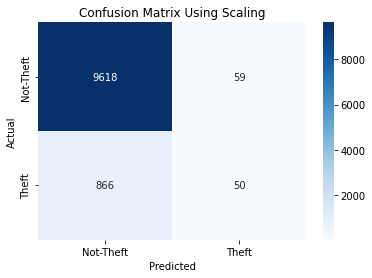

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
TP = 9618
FP = 59
TN = 50
FN = 866

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap([[TP, FP], [FN, TN]], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not-Theft', 'Theft'], yticklabels=['Not-Theft', 'Theft'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Using Scaling')
plt.show()

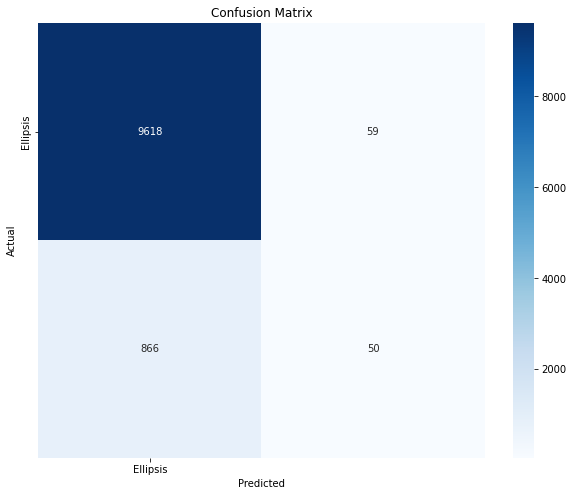

In [29]:
import seaborn as sns
cm = confusion_matrix(actual, predicted)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[...], yticklabels=[...])  # Replace [...] with your class labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

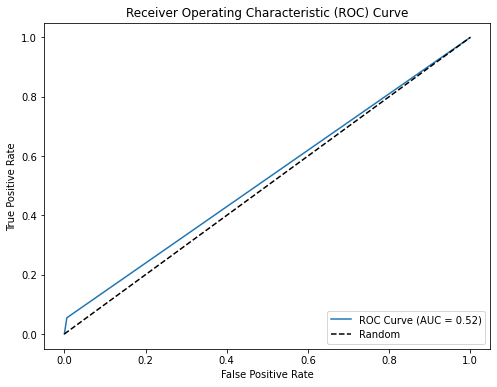

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(actual, predicted)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [31]:
df = pd.DataFrame(X_test).head(10)
#df = pd.DataFrame(X_testNormal)
df.to_csv("D:\ElectricityTheft\AllCol\Xtest.csv")


In [32]:
df = pd.DataFrame(X_train).head(10)

df.to_csv("D:\ElectricityTheft\AllCol\Xtrain.csv")

In [33]:
val1=[]
val2=[]
for y in y_pred:
    print(y[0])
    print(y[1])
    print("====")
    val1.append(y[0])
    val2.append(y[1])

0.8720438
0.12795618
====
0.96222705
0.037772883
====
0.94229555
0.057704464
====
0.9655109
0.034489118
====
0.938335
0.061664965
====
0.90848213
0.091517895
====
0.9147545
0.08524547
====
0.79337066
0.20662938
====
0.9762063
0.023793748
====
0.7153455
0.28465444
====
0.9085885
0.09141144
====
0.9531004
0.046899594
====
0.90737575
0.09262422
====
0.98189825
0.018101785
====
0.93155605
0.06844396
====
0.98476285
0.015237075
====
0.83952814
0.16047184
====
0.879486
0.12051397
====
0.8548758
0.1451242
====
0.8477204
0.15227954
====
0.83618623
0.16381371
====
0.9344682
0.06553177
====
0.9693552
0.030644808
====
0.70800436
0.2919956
====
0.8905589
0.1094411
====
0.9797539
0.020246053
====
0.9499661
0.05003387
====
0.97668016
0.023319885
====
0.8696117
0.1303884
====
0.98481524
0.015184777
====
0.8418067
0.1581933
====
0.89007235
0.10992766
====
0.86375946
0.13624056
====
0.9706364
0.029363504
====
0.90735906
0.092640914
====
0.8126137
0.18738633
====
0.97163355
0.028366454
====
0.87851906
0

====
0.95574147
0.044258557
====
0.85378486
0.14621508
====
0.95864373
0.04135624
====
0.8987436
0.10125636
====
0.8954782
0.10452174
====
0.9770198
0.022980195
====
0.9797681
0.020231927
====
0.97518677
0.024813302
====
0.9222274
0.07777258
====
0.8883575
0.11164246
====
0.9590449
0.040955126
====
0.92829156
0.07170839
====
0.76732093
0.23267905
====
0.87658936
0.12341063
====
0.9846581
0.015341833
====
0.95411783
0.045882158
====
0.9736829
0.026317157
====
0.9834669
0.016533123
====
0.79448247
0.20551755
====
0.97735536
0.022644661
====
0.25426182
0.74573815
====
0.60348797
0.396512
====
0.9374344
0.06256562
====
0.975019
0.02498101
====
0.86271644
0.13728349
====
0.95052826
0.049471732
====
0.8844992
0.11550077
====
0.9558593
0.044140723
====
0.88727665
0.11272333
====
0.97895205
0.021047905
====
0.8994446
0.10055544
====
0.7983929
0.20160708
====
0.95165646
0.04834349
====
0.96648717
0.03351286
====
0.97349226
0.026507739
====
0.90901
0.09099003
====
0.8473831
0.15261684
====
0.891

0.021216812
====
0.9690606
0.030939447
====
0.97069854
0.029301487
====
0.93499106
0.06500894
====
0.95782757
0.042172395
====
0.84410495
0.15589501
====
0.95609343
0.043906506
====
0.8365295
0.16347052
====
0.92844844
0.07155156
====
0.61168
0.38832
====
0.88601667
0.11398333
====
0.98445606
0.015543926
====
0.91459745
0.085402615
====
0.93506485
0.06493518
====
0.95864373
0.04135624
====
0.96631247
0.03368747
====
0.8396132
0.16038685
====
0.9572247
0.042775292
====
0.95215344
0.047846586
====
0.84440935
0.15559065
====
0.88036174
0.11963821
====
0.84488994
0.15511002
====
0.95312345
0.0468766
====
0.9605127
0.039487313
====
0.9752955
0.024704525
====
0.91476136
0.08523862
====
0.884152
0.11584799
====
0.94890493
0.051095128
====
0.9384681
0.06153186
====
0.97956413
0.020435873
====
0.94510615
0.054893844
====
0.9311538
0.06884625
====
0.87408787
0.12591216
====
0.974069
0.02593104
====
0.87079775
0.12920229
====
0.9230196
0.07698042
====
0.98076135
0.019238593
====
0.96133995
0.0386

0.06039828
====
0.9395348
0.06046524
====
0.96265095
0.037349015
====
0.9698318
0.03016815
====
0.9761121
0.02388793
====
0.9121745
0.0878254
====
0.95616764
0.0438324
====
0.82814664
0.17185335
====
0.93543065
0.064569324
====
0.92942035
0.07057966
====
0.92236966
0.07763034
====
0.93238944
0.06761061
====
0.85112584
0.14887416
====
0.84309125
0.15690875
====
0.8887262
0.111273885
====
0.97989666
0.020103307
====
0.9819058
0.018094197
====
0.7429747
0.25702524
====
0.94936615
0.05063386
====
0.9742391
0.025760882
====
0.69747204
0.30252793
====
0.95818216
0.04181778
====
0.95852584
0.041474156
====
0.81637007
0.18362996
====
0.7075436
0.29245636
====
0.90184164
0.09815834
====
0.91436374
0.08563628
====
0.9599976
0.040002357
====
0.89271736
0.10728261
====
0.97652537
0.0234746
====
0.9783117
0.021688353
====
0.98469377
0.015306225
====
0.9807957
0.019204333
====
0.8844521
0.11554795
====
0.8322444
0.16775563
====
0.90473366
0.09526635
====
0.9838096
0.016190372
====
0.86212295
0.13787

0.018372227
====
0.9646724
0.035327647
====
0.97506386
0.024936162
====
0.90289164
0.09710837
====
0.86495996
0.13504004
====
0.9575998
0.042400207
====
0.961573
0.03842702
====
0.82703257
0.17296745
====
0.9470381
0.052961867
====
0.9395722
0.060427733
====
0.83049184
0.16950813
====
0.9586036
0.041396383
====
0.8449832
0.15501681
====
0.97606194
0.023938091
====
0.9143397
0.085660264
====
0.9059786
0.094021454
====
0.8422094
0.15779056
====
0.9388739
0.06112609
====
0.93715525
0.0628447
====
0.92299896
0.077001
====
0.9543473
0.045652658
====
0.93392825
0.06607177
====
0.97645694
0.023542993
====
0.8655312
0.13446878
====
0.9109151
0.08908488
====
0.8920943
0.107905746
====
0.9577134
0.042286534
====
0.96285903
0.037140924
====
0.95496744
0.045032594
====
0.6557112
0.34428886
====
0.7286071
0.27139285
====
0.8995365
0.10046349
====
0.97102237
0.028977651
====
0.92154676
0.078453176
====
0.95864373
0.04135624
====
0.971348
0.02865202
====
0.9739649
0.02603505
====
0.91223484
0.0877651

0.016338082
====
0.9361789
0.06382104
====
0.8974002
0.10259983
====
0.9807529
0.019247098
====
0.91342413
0.086575784
====
0.7920461
0.20795386
====
0.94462264
0.055377338
====
0.93007016
0.06992983
====
0.7271754
0.27282462
====
0.95524096
0.044759084
====
0.86285233
0.13714772
====
0.8949269
0.10507315
====
0.82693285
0.17306715
====
0.9371735
0.062826574
====
0.97876453
0.021235436
====
0.8911925
0.10880751
====
0.9161677
0.083832316
====
0.88667923
0.11332075
====
0.95612884
0.04387109
====
0.5280877
0.47191232
====
0.9164871
0.08351298
====
0.8487245
0.15127546
====
0.72540015
0.27459985
====
0.908206
0.09179401
====
0.95857763
0.041422322
====
0.93527085
0.06472912
====
0.93250084
0.06749916
====
0.38089567
0.6191043
====
0.86303794
0.136962
====
0.84992576
0.15007426
====
0.79093325
0.2090667
====
0.949391
0.050609067
====
0.9640035
0.03599654
====
0.9828693
0.01713061
====
0.8900053
0.10999464
====
0.83294827
0.16705173
====
0.8759545
0.12404554
====
0.84784925
0.15215072
====

0.15292004
====
0.98091847
0.019081552
====
0.9757295
0.024270555
====
0.94561315
0.054386895
====
0.9203107
0.07968931
====
0.9801326
0.019867342
====
0.9701292
0.029870842
====
0.8707827
0.12921731
====
0.9272915
0.07270855
====
0.9210415
0.07895857
====
0.94993305
0.050066914
====
0.9519264
0.048073534
====
0.950324
0.049676012
====
0.90481716
0.09518285
====
0.8867077
0.11329225
====
0.8735159
0.1264841
====
0.7754022
0.22459778
====
0.9503834
0.049616523
====
0.96288604
0.037113942
====
0.9259354
0.07406462
====
0.88097465
0.11902535
====
0.82613504
0.17386502
====
0.85959715
0.14040285
====
0.9557468
0.04425321
====
0.9642773
0.03572271
====
0.8326742
0.16732578
====
0.9709117
0.029088339
====
0.88759077
0.11240925
====
0.96109563
0.038904425
====
0.96951765
0.030482376
====
0.95801914
0.041980874
====
0.9276437
0.07235625
====
0.9365674
0.06343257
====
0.94352317
0.05647686
====
0.9046525
0.09534755
====
0.9749384
0.02506157
====
0.95864373
0.04135624
====
0.8782686
0.12173137
=

====
0.8031086
0.19689141
====
0.7725167
0.2274832
====
0.83303124
0.16696876
====
0.90037155
0.09962845
====
0.9759571
0.024042932
====
0.96542645
0.034573577
====
0.89247185
0.107528135
====
0.959706
0.04029394
====
0.8110361
0.18896386
====
0.9609641
0.03903595
====
0.97848904
0.021510987
====
0.9461964
0.0538036
====
0.40202475
0.5979752
====
0.95864373
0.04135624
====
0.98391044
0.016089575
====
0.8976099
0.10239009
====
0.92278373
0.07721631
====
0.8829643
0.11703566
====
0.93038255
0.0696175
====
0.9666939
0.033306073
====
0.92291176
0.07708827
====
0.9213549
0.078645125
====
0.88591164
0.114088304
====
0.8763542
0.12364579
====
0.9547796
0.045220315
====
0.96498656
0.03501338
====
0.91002
0.08998006
====
0.93830645
0.06169354
====
0.88420177
0.115798175
====
0.9754463
0.024553698
====
0.9848529
0.015147044
====
0.90845245
0.09154754
====
0.84982544
0.15017462
====
0.95469075
0.04530928
====
0.8655094
0.13449062
====
0.98469585
0.015304177
====
0.983603
0.01639701
====
0.4341757

====
0.8382462
0.16175383
====
0.97449714
0.025502877
====
0.8989921
0.10100781
====
0.7979794
0.20202054
====
0.8943944
0.10560562
====
0.84186375
0.15813631
====
0.9180442
0.0819558
====
0.8731392
0.12686075
====
0.94153035
0.05846959
====
0.95909
0.040910028
====
0.9793362
0.020663766
====
0.95793325
0.0420667
====
0.8818146
0.11818538
====
0.95526946
0.04473054
====
0.9284608
0.071539156
====
0.92477113
0.07522894
====
0.9607077
0.03929229
====
0.8854215
0.11457856
====
0.95016754
0.04983249
====
0.8876141
0.11238592
====
0.9390027
0.060997266
====
0.9669213
0.03307869
====
0.84275365
0.15724637
====
0.9297265
0.070273496
====
0.83519274
0.16480729
====
0.9551363
0.044863664
====
0.9707903
0.029209685
====
0.95413965
0.04586028
====
0.9420586
0.057941433
====
0.92109656
0.07890346
====
0.7388428
0.26115724
====
0.96314436
0.0368556
====
0.95864373
0.04135624
====
0.77251107
0.22748893
====
0.9007112
0.09928879
====
0.8911989
0.10880115
====
0.95864373
0.04135624
====
0.90333
0.0966

0.9424918
0.057508193
====
0.92788446
0.072115555
====
0.9506981
0.049301933
====
0.9786583
0.021341663
====
0.9840911
0.015908938
====
0.7949802
0.20501979
====
0.78726697
0.21273303
====
0.9610014
0.03899863
====
0.97253764
0.027462335
====
0.94191784
0.058082193
====
0.9581103
0.041889742
====
0.94051725
0.05948278
====
0.7638139
0.23618607
====
0.96073824
0.039261755
====
0.88833654
0.11166351
====
0.89199775
0.10800226
====
0.955683
0.044317037
====
0.8033893
0.19661066
====
0.9311963
0.06880372
====
0.84226674
0.1577332
====
0.8838677
0.116132304
====
0.9563523
0.04364769
====
0.8944881
0.105511904
====
0.92247605
0.07752397
====
0.95128393
0.048716065
====
0.8968394
0.1031606
====
0.9516285
0.04837153
====
0.9725381
0.027461903
====
0.9731901
0.026809847
====
0.95963925
0.04036069
====
0.9342785
0.06572156
====
0.9969817
0.0030182893
====
0.8899758
0.11002423
====
0.9395259
0.060474098
====
0.7917117
0.20828833
====
0.88360775
0.11639222
====
0.8429606
0.15703934
====
0.8724886


0.04664529
====
0.9317104
0.06828957
====
0.868302
0.13169806
====
0.83779615
0.16220391
====
0.9384274
0.061572626
====
0.95609266
0.04390737
====
0.9272404
0.072759636
====
0.97109014
0.028909821
====
0.950896
0.049103953
====
0.96108526
0.038914673
====
0.9748642
0.025135795
====
0.83406055
0.16593951
====
0.95439607
0.045603923
====
0.91070276
0.08929721
====
0.8642955
0.13570456
====
0.89815086
0.101849124
====
0.94277054
0.057229523
====
0.93654704
0.06345295
====
0.79658866
0.20341136
====
0.96639735
0.03360266
====
0.8418268
0.15817317
====
0.91112363
0.08887638
====
0.93099743
0.06900257
====
0.97319746
0.026802495
====
0.9589714
0.041028645
====
0.85258675
0.14741324
====
0.749949
0.25005102
====
0.8177409
0.18225905
====
0.9557634
0.044236615
====
0.983245
0.016754936
====
0.9710911
0.028908955
====
0.983887
0.016112933
====
0.9783131
0.021686956
====
0.9718669
0.028133098
====
0.85738957
0.14261039
====
0.9234419
0.076558135
====
0.9823789
0.01762108
====
0.91456115
0.08543

0.05631518
====
0.9419999
0.058000058
====
0.95864373
0.04135624
====
0.9692824
0.03071763
====
0.8772523
0.12274778
====
0.9389765
0.06102341
====
0.97021985
0.029780176
====
0.81489205
0.18510792
====
0.8845143
0.11548568
====
0.96118283
0.038817156
====
0.9632281
0.036771934
====
0.9376959
0.06230406
====
0.97186434
0.028135654
====
0.81896186
0.18103817
====
0.87957144
0.120428555
====
0.9097146
0.09028549
====
0.712533
0.28746706
====
0.95208156
0.04791843
====
0.9228885
0.07711154
====
0.78811264
0.21188734
====
0.8576303
0.14236975
====
0.8606383
0.1393617
====
0.8908497
0.10915033
====
0.9755941
0.02440587
====
0.95732826
0.042671736
====
0.9335303
0.06646973
====
0.9084366
0.091563374
====
0.9181289
0.08187104
====
0.96775323
0.03224673
====
0.9053076
0.09469246
====
0.8823508
0.117649235
====
0.9286225
0.07137753
====
0.8958038
0.10419614
====
0.98430365
0.015696295
====
0.89041173
0.10958831
====
0.94687885
0.053121142
====
0.9306548
0.069345236
====
0.9639779
0.036022045
==

0.95643276
0.043567203
====
0.90117556
0.09882443
====
0.9574914
0.04250861
====
0.97687054
0.02312953
====
0.96501213
0.034987923
====
0.84770626
0.15229373
====
0.9373272
0.06267275
====
0.4721793
0.52782065
====
0.9028021
0.0971979
====
0.91629696
0.08370306
====
0.7915853
0.20841463
====
0.8816943
0.11830566
====
0.84122336
0.15877666
====
0.9417329
0.05826714
====
0.96409136
0.035908684
====
0.9735083
0.026491767
====
0.89731944
0.10268057
====
0.9043907
0.09560927
====
0.9613948
0.038605217
====
0.87208515
0.12791489
====
0.9818708
0.01812927
====
0.88128376
0.11871625
====
0.9476093
0.052390754
====
0.83269864
0.16730136
====
0.8956045
0.10439553
====
0.84251326
0.15748677
====
0.8834724
0.11652763
====
0.88493997
0.11505998
====
0.9615224
0.03847755
====
0.8943713
0.10562875
====
0.83278894
0.16721112
====
0.21719621
0.7828038
====
0.9614571
0.038542923
====
0.8543123
0.14568768
====
0.8797886
0.120211475
====
0.81461954
0.1853805
====
0.8902096
0.10979038
====
0.90166986
0.098

====
0.9574433
0.042556684
====
0.8504932
0.14950682
====
0.8411915
0.15880848
====
0.80772924
0.19227076
====
0.9007082
0.099291764
====
0.94561136
0.054388635
====
0.9532353
0.046764668
====
0.9820117
0.017988255
====
0.91627055
0.08372948
====
0.93908715
0.060912855
====
0.82270825
0.17729174
====
0.8917141
0.10828585
====
0.69264185
0.30735815
====
0.9763431
0.023656871
====
0.9240298
0.07597019
====
0.97492605
0.025073942
====
0.99248624
0.0075137164
====
0.9851541
0.01484584
====
0.9515299
0.04847011
====
0.5739539
0.42604607
====
0.9350789
0.06492111
====
0.9795603
0.02043967
====
0.94248337
0.057516642
====
0.97342086
0.026579188
====
0.4679563
0.5320437
====
0.79462266
0.20537733
====
0.89727974
0.1027203
====
0.95864373
0.04135624
====
0.86605805
0.13394195
====
0.8558938
0.14410624
====
0.89552075
0.10447929
====
0.8673438
0.13265628
====
0.976513
0.023487035
====
0.90253085
0.09746917
====
0.91537887
0.08462111
====
0.9801002
0.019899832
====
0.95864373
0.04135624
====
0.98

0.16654545
====
0.59339553
0.4066045
====
0.94780654
0.052193455
====
0.95192635
0.048073635
====
0.91847676
0.081523255
====
0.9574915
0.042508528
====
0.90152955
0.09847044
====
0.65691054
0.34308955
====
0.93661755
0.06338242
====
0.9366123
0.06338773
====
0.9516623
0.04833775
====
0.96218556
0.03781443
====
0.94719636
0.05280357
====
0.83006024
0.16993971
====
0.9803868
0.019613232
====
0.94406694
0.05593306
====
0.9141635
0.08583657
====
0.9621931
0.037806973
====
0.96900237
0.030997591
====
0.2509857
0.7490143
====
0.76701134
0.23298872
====
0.28682488
0.7131752
====
0.94951004
0.050489895
====
0.9817841
0.018215848
====
0.8589239
0.14107612
====
0.9877792
0.0122208595
====
0.9233943
0.07660564
====
0.94346344
0.056536563
====
0.953111
0.04688903
====
0.9673072
0.032692775
====
0.9762882
0.023711791
====
0.9561126
0.043887366
====
0.96725655
0.03274345
====
0.94222444
0.057775542
====
0.9846581
0.015341833
====
0.8961377
0.10386228
====
0.92703795
0.07296201
====
0.9385982
0.0614

====
0.8631209
0.13687907
====
0.90850073
0.09149929
====
0.98294026
0.01705971
====
0.7301796
0.26982036
====
0.97732747
0.022672512
====
0.9855134
0.014486688
====
0.76141167
0.23858836
====
0.9337803
0.06621967
====
0.909077
0.09092302
====
0.961509
0.038490996
====
0.98461413
0.015385873
====
0.96996844
0.030031567
====
0.9539161
0.04608391
====
0.94085294
0.059147097
====
0.87887734
0.12112269
====
0.8946187
0.10538128
====
0.7325038
0.26749623
====
0.8947436
0.10525633
====
0.9366274
0.06337263
====
0.9653767
0.03462335
====
0.7426533
0.2573467
====
0.8090931
0.19090682
====
0.90903974
0.090960294
====
0.48186404
0.5181359
====
0.8660058
0.13399425
====
0.888591
0.111409
====
0.7825052
0.2174948
====
0.93298626
0.067013755
====
0.96147114
0.038528796
====
0.9783625
0.02163753
====
0.95728064
0.04271941
====
0.9730132
0.026986742
====
0.81084317
0.18915683
====
0.84059554
0.15940443
====
0.8977443
0.10225569
====
0.9597121
0.040287953
====
0.64538336
0.35461664
====
0.8743396
0.12

0.12952769
====
0.92766833
0.07233164
====
0.88557917
0.11442085
====
0.85019535
0.14980465
====
0.94247967
0.057520382
====
0.95032144
0.04967854
====
0.95758855
0.04241148
====
0.94068825
0.059311714
====
0.8767838
0.123216234
====
0.949118
0.050881997
====
0.93965703
0.060342964
====
0.98465794
0.015342028
====
0.9548065
0.04519354
====
0.8477097
0.15229027
====
0.8347483
0.1652517
====
0.915147
0.08485296
====
0.982419
0.017581008
====
0.8145354
0.18546462
====
0.9225321
0.077468
====
0.931544
0.06845597
====
0.97836703
0.021632953
====
0.9697203
0.030279702
====
0.87362224
0.12637782
====
0.9480274
0.05197261
====
0.6821364
0.3178636
====
0.94957227
0.05042772
====
0.9489635
0.051036406
====
0.8919447
0.10805534
====
0.84533906
0.15466093
====
0.9846966
0.01530338
====
0.9474326
0.052567367
====
0.9849568
0.015043166
====
0.9468019
0.053198073
====
0.9112535
0.088746436
====
0.9800719
0.019928042
====
0.8602921
0.13970791
====
0.9059864
0.094013594
====
0.9541276
0.045872368
====


====
0.81343967
0.1865603
====
0.9152905
0.08470946
====
0.8991039
0.10089607
====
0.18092233
0.8190777
====
0.86091113
0.13908887
====
0.90971917
0.09028084
====
0.9327781
0.06722185
====
0.9160451
0.08395491
====
0.9764305
0.023569532
====
0.9586743
0.04132567
====
0.82023764
0.17976242
====
0.98442996
0.015570017
====
0.8998621
0.10013788
====
0.97801346
0.021986522
====
0.8801073
0.11989271
====
0.9106657
0.089334354
====
0.9993358
0.0006641035
====
0.9525327
0.047467317
====
0.88119274
0.1188072
====
0.9349632
0.065036796
====
0.981489
0.018511022
====
0.92601204
0.073987976
====
0.91511154
0.08488843
====
0.97081786
0.02918217
====
0.87985057
0.120149426
====
0.97838914
0.021610882
====
0.93034077
0.06965923
====
0.89679474
0.10320523
====
0.8837986
0.116201416
====
0.8230773
0.17692271
====
0.9696023
0.030397722
====
0.21451885
0.78548115
====
0.9312143
0.0687857
====
0.90235823
0.097641766
====
0.95100826
0.048991796
====
0.8827591
0.11724094
====
0.9228353
0.077164695
====
0.9

0.9320111
0.06798888
====
0.88670415
0.11329588
====
0.9688081
0.031191865
====
0.90913767
0.09086225
====
0.9693908
0.03060913
====
0.9337198
0.0662802
====
0.9757043
0.024295656
====
0.8899196
0.11008046
====
0.8474924
0.15250753
====
0.95867354
0.041326534
====
0.9344373
0.065562665
====
0.97576684
0.024233203
====
0.94971895
0.050281025
====
0.9650944
0.034905583
====
0.7269711
0.27302897
====
0.98441124
0.015588739
====
0.91912633
0.08087359
====
0.8204718
0.17952816
====
0.950453
0.04954704
====
0.8292041
0.17079592
====
0.6996008
0.30039927
====
0.87946093
0.12053901
====
0.9768091
0.02319093
====
0.9345017
0.065498255
====
0.98462707
0.015372933
====
0.7981011
0.2018989
====
0.9743584
0.025641585
====
0.9236889
0.076311074
====
0.9798823
0.020117626
====
0.9850461
0.014953976
====
0.87613326
0.12386674
====
0.8717996
0.12820043
====
0.98400396
0.01599606
====
0.8453585
0.15464152
====
0.97100645
0.028993549
====
0.8023285
0.19767141
====
0.9554651
0.044534888
====
0.8335351
0.1

====
0.98404443
0.015955497
====
0.82339406
0.17660588
====
0.8289227
0.17107736
====
0.9514967
0.048503336
====
0.9711574
0.028842561
====
0.951702
0.04829796
====
0.86599594
0.13400409
====
0.9718508
0.028149191
====
0.958577
0.041422985
====
0.9413721
0.05862797
====
0.8570925
0.14290752
====
0.93713045
0.06286953
====
0.9357484
0.06425159
====
0.96019584
0.039804123
====
0.98367715
0.016322862
====
0.9754235
0.024576481
====
0.9187759
0.08122403
====
0.84348005
0.15651992
====
0.8677742
0.13222578
====
0.9252623
0.07473776
====
0.9696531
0.030346816
====
0.9782558
0.02174417
====
0.98531777
0.014682262
====
0.9480384
0.05196162
====
0.956013
0.04398702
====
0.26834515
0.7316549
====
0.85949916
0.14050078
====
0.9651067
0.034893334
====
0.8881709
0.111829065
====
0.88031954
0.11968049
====
0.83512527
0.16487467
====
0.76798594
0.23201409
====
0.91559696
0.084403016
====
0.81570685
0.1842931
====
0.8595061
0.14049396
====
0.8567814
0.14321858
====
0.8683215
0.13167852
====
0.9557242


0.7663433
0.23365669
====
0.971628
0.02837198
====
0.92868054
0.071319476
====
0.9405215
0.059478536
====
0.94194794
0.058052015
====
0.9783625
0.02163753
====
0.88096046
0.11903953
====
0.9131691
0.08683092
====
0.8693347
0.1306653
====
0.9730651
0.02693498
====
0.9480589
0.051941067
====
0.9447685
0.055231474
====
0.9747252
0.025274796
====
0.91505134
0.08494862
====
0.737361
0.26263905
====
0.86516994
0.13483009
====
0.9590133
0.040986694
====
0.65217036
0.34782964
====
0.9721948
0.027805224
====
0.8699796
0.13002035
====
0.9811241
0.01887587
====
0.8643305
0.13566956
====
0.8681563
0.13184369
====
0.9297963
0.070203714
====
0.83069193
0.16930805
====
0.90232414
0.097675845
====
0.9581006
0.04189938
====
0.9480984
0.051901612
====
0.92722446
0.072775535
====
0.9595677
0.04043232
====
0.9683309
0.03166909
====
0.9813804
0.018619632
====
0.94066817
0.05933181
====
0.9718212
0.028178804
====
0.8759718
0.124028236
====
0.9427906
0.057209406
====
0.9350654
0.06493466
====
0.7954548
0.204

====
0.9120705
0.0879295
====
0.9447655
0.05523451
====
0.93202716
0.06797281
====
0.88838017
0.11161986
====
0.780732
0.21926805
====
0.94235146
0.057648588
====
0.8751904
0.12480962
====
0.98291713
0.017082859
====
0.9697548
0.030245157
====
0.96260834
0.037391715
====
0.9840984
0.015901579
====
0.9469935
0.053006466
====
0.9623983
0.037601694
====
0.90423536
0.09576463
====
0.92924607
0.07075391
====
0.9519892
0.04801077
====
0.9746411
0.025358897
====
0.9786214
0.0213785
====
0.85104924
0.14895068
====
0.987306
0.012693967
====
0.9585151
0.041484855
====
0.87617296
0.123826966
====
0.88010424
0.11989579
====
0.8461514
0.15384854
====
0.9853216
0.014678385
====
0.9693834
0.030616589
====
0.9234288
0.07657122
====
0.7694324
0.23056759
====
0.9654052
0.034594752
====
0.8821863
0.11781375
====
0.9625216
0.037478346
====
0.8802908
0.11970923
====
0.888657
0.111343056
====
0.93241584
0.06758418
====
0.9792406
0.020759428
====
0.80984175
0.1901583
====
0.9771115
0.022888519
====
0.9676407

====
0.92643636
0.073563635
====
0.9612718
0.038728137
====
0.884729
0.115270965
====
0.8993482
0.10065188
====
0.916512
0.083487965
====
0.7820964
0.2179036
====
0.9390065
0.060993534
====
0.96608615
0.0339139
====
0.90138626
0.09861372
====
0.95442843
0.045571614
====
0.9333372
0.06666279
====
0.94244736
0.057552632
====
0.98013467
0.019865366
====
0.97475135
0.025248656
====
0.8664163
0.13358372
====
0.7731519
0.22684817
====
0.89661396
0.10338605
====
0.9694855
0.030514507
====
0.9686877
0.03131229
====
0.8815831
0.118416876
====
0.97429085
0.025709156
====
0.8891921
0.110807955
====
0.9528795
0.04712044
====
0.9344194
0.06558064
====
0.50314236
0.49685767
====
0.9724502
0.027549798
====
0.9853023
0.014697701
====
0.9576516
0.04234839
====
0.94304216
0.056957893
====
0.9577052
0.042294737
====
0.91646504
0.08353494
====
0.90629476
0.093705215
====
0.9249931
0.07500691
====
0.952353
0.047647063
====
0.9822812
0.017718805
====
0.8933494
0.10665058
====
0.944272
0.05572799
====
0.7581

0.19061595
====
0.7705503
0.22944976
====
0.80092585
0.19907416
====
0.93360263
0.06639743
====
0.9425859
0.057414107
====
0.9030509
0.09694909
====
0.97800124
0.021998754
====
0.9791054
0.020894563
====
0.85725105
0.1427489
====
0.83693725
0.1630627
====
0.98021126
0.019788692
====
0.98411775
0.015882295
====
0.9014933
0.098506734
====
0.89881325
0.10118679
====
0.96756715
0.03243284
====
0.7029683
0.29703167
====
0.94854206
0.05145791
====
0.8597489
0.14025103
====
0.84677905
0.15322097
====
0.90477407
0.09522599
====
0.7769167
0.22308333
====
0.8372354
0.16276458
====
0.9582142
0.041785743
====
0.88951284
0.110487185
====
0.8891981
0.11080183
====
0.8711034
0.12889662
====
0.9740708
0.025929233
====
0.8885055
0.111494474
====
0.931798
0.06820203
====
0.8596076
0.14039236
====
0.97261876
0.027381303
====
0.9045402
0.09545984
====
0.8919048
0.10809523
====
0.9553856
0.04461431
====
0.8227892
0.1772108
====
0.83549553
0.16450451
====
0.79989517
0.20010486
====
0.7011384
0.29886162
====

In [34]:
df = pd.DataFrame({'Actual': actual, 'Softmax Predicted Value 1': val1, 'Softmax Predicted Value 2': val2, 'Predicted Result': predicted})
df.to_csv("D:\ElectricityTheft\AllCol\ActualPredicted.csv")

In [35]:
df = pd.DataFrame({'Training Accuracy': history.history['accuracy'], 'Test Accuracy': history.history['val_accuracy']})
df.to_csv("D:\ElectricityTheft\AllCol\pcaAccuracies.csv")